# Thématique 3 - Analyse bivariée entre variables qualitatives

Réalisé par Alexandre Pauly.

### Importation des librairies

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data pre-processing

In [16]:
# Préparation du fichier de données
filepath = "../data"
filename = "employes.csv"
file = os.path.join(filepath, filename)

# Lecture des données
df_original = pd.read_csv(file, delimiter=";")
df = df_original.copy()

# Affichage des indicateurs de positions et de dispersions
df.describe()

,F,H
count,3.000000,3.000000
mean,21.666667,22.000000
std,21.079216,23.515952
min,4.000000,6.000000
25%,10.000000,8.500000
50%,16.000000,11.000000
75%,30.500000,30.000000
max,45.000000,49.000000


Ce jeu de données comptabilise le nombre d'employés homme et femme ayant fait des études (Bac+3, Bac+5 et Bac+8). Ici nous ne pouvons pas compter directement le nombre d'employés car les variables sont qualitatives. Pour connaître le nombre d'individus de l'entreprise, il faudra calculer l'effectif total ou par lecture du tableau de contigence. Malgré tout, il y entre 4 et 45 hommes et entre 6 et 49 femmes qui ont fait des études.

**Remarque** : Comme nous sommes dans un croisement qualitatif x qualitatif, il est inutile d'analyser des indicateurs comme la moyenne et la médiane.

In [17]:
df.head()

,X\Y,F,H
0,Bac+3,45,49
1,Bac+5,16,11
2,Bac+8,4,6


In [18]:
df.tail()

,X\Y,F,H
0,Bac+3,45,49
1,Bac+5,16,11
2,Bac+8,4,6


In [19]:
df.shape

(3, 3)

In [20]:
df.dtypes

X\Y    object
F       int64
H       int64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X\Y     3 non-null      object
 1   F       3 non-null      int64 
 2   H       3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [22]:
df.columns

Index(['X\Y', 'F', 'H'], dtype='object')

Explication des variables :
- F : Nombre de femmes diplômées
- H : Nombre d'hommes diplômés

In [23]:
df.isnull().sum()

X\Y    0
F      0
H      0
dtype: int64

In [24]:
print(df)

     X\Y   F   H
0  Bac+3  45  49
1  Bac+5  16  11
2  Bac+8   4   6


### Calcul des effectifs marginaux

In [25]:
# Calcul de la somme des lignes (eff_ligne)
df['eff_ligne'] = df['F'] + df['H']

# Calcul de la somme des colonnes (eff_colonne)
eff_colonne = df[['F', 'H', 'eff_ligne']].sum()

# Ajout d'une ligne pour les "eff_colonne"
df.loc['eff_colonne'] = eff_colonne

# Calcul du total général
total_general = eff_colonne['eff_ligne']

print(df)

               X\Y     F     H  eff_ligne
0            Bac+3  45.0  49.0       94.0
1            Bac+5  16.0  11.0       27.0
2            Bac+8   4.0   6.0       10.0
eff_colonne    NaN  65.0  66.0      131.0


Uniquement des calculs d'effectifs ou de fréquences. Les indicateurs numériques (moyenne, médiane,…) ne veulent rien dire puisqu'il n'y a pas d'échelle de mesure (même si les modalités sont codées 0, 1 ,2,…)
n3.=10 représente les effectifs des bac+8 tous sexes confondus
n.1=65 représente les effectifs des femmes tous niveaux de formation confondus

### Calcul des fréquences marginales

In [26]:
# Création d'un tableau de fréquences
df_freq = df.copy()

# Renommer les colonnes dans df_freq
df_freq = df_freq.rename(columns={'eff_ligne': 'freq_ligne'})
df_freq.index = df_freq.index.str.replace('eff_colonne', 'freq_colonne')

# Calcul des fréquences de chaque case
df_freq[['F', 'H', 'freq_ligne']] = df_freq[['F', 'H', 'freq_ligne']] / total_general

# Affichage du tableau de fréquences
print(df_freq)

                X\Y         F         H  freq_ligne
NaN           Bac+3  0.343511  0.374046    0.717557
NaN           Bac+5  0.122137  0.083969    0.206107
NaN           Bac+8  0.030534  0.045802    0.076336
freq_colonne    NaN  0.496183  0.503817    1.000000


### Profils lignes

In [27]:
# Création d'un tableau de profils lignes
df_profil = df.copy()

# Renommer les colonnes dans df_profil
df_profil = df_profil.rename(columns={'eff_ligne': 'Total'})
df_profil.index = df_profil.index.str.replace('eff_colonne', 'Profil ligne moyen')

# Total de chaque ligne
total_ligne = df_profil['Total']

# Calcul de chaque profil ligne
df_profil['F'] /= total_ligne
df_profil['H'] /= total_ligne
df_profil['Total'] /= total_ligne

# Affichage du tableau des profils lignes
print(df_profil)

                      X\Y         F         H  Total
NaN                 Bac+3  0.478723  0.521277    1.0
NaN                 Bac+5  0.592593  0.407407    1.0
NaN                 Bac+8  0.400000  0.600000    1.0
Profil ligne moyen    NaN  0.496183  0.503817    1.0


On compare les profils lignes avec les fréquences marginales des sexes (=profil ligne moyen). Attention, on reporte la ligne des fréquences marginales obtenue dans le tableau des fréquences et on ne calcule pas la somme ou la moyenne des profils lignes!!!!!

Il y a 50% de femmes dans l'entreprise. Ce pourcentage descend à 40% chez les bac+8 et augmente à 60% chez les bac+5. Cela laisse penser que la répartition des femmes dépend du niveau de formation

### Histogramme des profils lignes

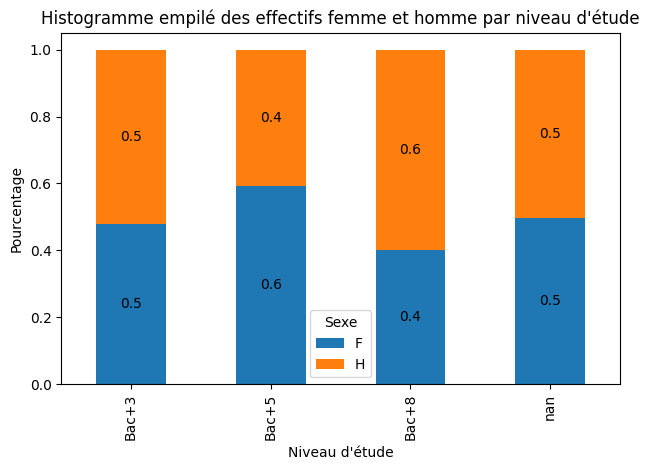

In [41]:
# Suppression de la colonne 'total' et de la ligne 'freq_marginale' si elles existent
df_profil_temp = df_profil.drop(columns=['Total'], errors='ignore')

# Tracé de l'histogramme empilé
ax = df_profil_temp.set_index('X\\Y').plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Ajouter les valeurs sur chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.001f', label_type='center')

plt.title('Histogramme empilé des effectifs femme et homme par niveau d\'étude')
plt.ylabel('Pourcentage')
plt.xlabel('Niveau d\'étude')
plt.legend(title='Sexe')
plt.tight_layout()

# Affichage de l'histogramme
plt.show()

On constate que la part d'hommes et femmes faisant des études est quasi égale, peu importe le nombre d'années. Plus précisemment :
- A bac+3, il y a autant d'hommes que de femmes.
- A bac+5, il y a 60% de femmes pour 40% d'hommes.
- A bac+8, il y a 40% de femmes pour 60% d'hommes.

### Profils colonnes

In [29]:
# Création d'un tableau de profils colonnes
df_colonne = df.copy()

# Renommer les colonnes dans df_colonne
df_colonne = df_colonne.rename(columns={'eff_ligne': 'Profil colonne moyen'})
df_colonne.index = df_colonne.index.str.replace('eff_colonne', 'Total')

# Total de chaque colonne
total_colonne = df_colonne.loc['Total']

# Calcul de chaque profil ligne
df_colonne[['F','H', 'Profil colonne moyen']] /= total_colonne

# Affichage du tableau des profils lignes
print(df_colonne)

         X\Y         F         H Profil colonne moyen
NaN    Bac+3  0.692308  0.742424             0.717557
NaN    Bac+5  0.246154  0.166667             0.206107
NaN    Bac+8  0.061538  0.090909             0.076336
Total    NaN       1.0       1.0                  1.0


Concernant les profils colonnes, il y a beaucoup moins d'écart entre la répartition total des niveaux de formation et la répartition par sexe. Il ne semble pas y avoir de dépendance entre ces variables

### Histogramme des profils colonnes

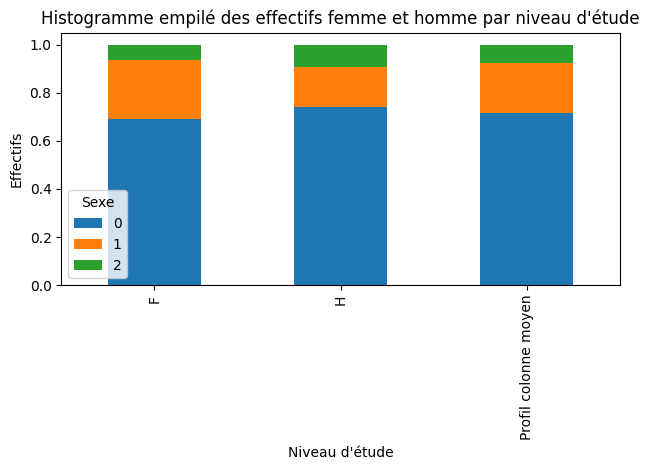

In [30]:
# Suppression de la colonne 'total' et de la ligne 'freq_marginale' si elles existent
# df_colonne_temp = df_colonne.drop(columns=['Profil colonne moyen'], errors='ignore')
df_colonne_temp = df_colonne[df_colonne.index != 'Total']
df_colonne_temp = df_colonne_temp.reset_index(drop=True)

df_colonne_temp = df_colonne_temp.T

df_colonne_temp.iloc[1:] = df_colonne_temp.iloc[1:].astype(float)

# Tracé de l'histogramme empilé
df_colonne_temp.iloc[1:].plot(kind='bar', stacked=True)
plt.title('Histogramme empilé des effectifs femme et homme par niveau d\'étude')
plt.ylabel('Effectifs')
plt.xlabel('Niveau d\'étude')
plt.legend(title='Sexe')
plt.tight_layout()

# Affichage de l'histogramme
plt.show()

### Lecture des données

- f31=0,03	Il y a 3% des salariés qui sont des femmes ayant bac+8

- f3.=0,076	Il y a 7,6% des salariés qui ont un bac+8

- f.1=0,496	Il y a 49,6% de femmes dans l'entreprise

- f3|1=4/65=0,06	Il y 6% de bac+8 parmi les femmes salariées

- f1|3=4/10=0,4	Il y a 40% de femmes parmi les bac+8

## Distance du Khi2
### Tableaux des effectifs observés vs théoriques

In [31]:
from scipy.stats import chi2_contingency as chi2_contingency

khi2, pval, ddl, contingent_theorique = chi2_contingency(df[['F','H']])

print("Tableau des effectifs observés :\n", df)

# Création d'un tableau des effectifs théoriques
df_theorique = df.copy()
df_theorique[['F', 'H']] = contingent_theorique

print("\nTableau des effectifs théoriques :\n", df_theorique)


Tableau des effectifs observés :
                X\Y     F     H  eff_ligne
0            Bac+3  45.0  49.0       94.0
1            Bac+5  16.0  11.0       27.0
2            Bac+8   4.0   6.0       10.0
eff_colonne    NaN  65.0  66.0      131.0

Tableau des effectifs théoriques :
                X\Y          F          H  eff_ligne
0            Bac+3  46.641221  47.358779       94.0
1            Bac+5  13.396947  13.603053       27.0
2            Bac+8   4.961832   5.038168       10.0
eff_colonne    NaN  65.000000  66.000000      131.0


### Tableaux des fréquences observés vs théoriques

In [32]:
khi2_freq, pval_freq, ddl_freq, contingent_theorique_freq = chi2_contingency(df_freq[['F','H']])

print("Tableau des effectifs observés :\n", df_freq)

# Création d'un tableau des effectifs théoriques
df_freq_theorique = df_freq.copy()
df_freq_theorique[['F', 'H']] = contingent_theorique_freq

print("\nTableau des effectifs théoriques :\n", df_freq_theorique)

Tableau des effectifs observés :
                 X\Y         F         H  freq_ligne
NaN           Bac+3  0.343511  0.374046    0.717557
NaN           Bac+5  0.122137  0.083969    0.206107
NaN           Bac+8  0.030534  0.045802    0.076336
freq_colonne    NaN  0.496183  0.503817    1.000000

Tableau des effectifs théoriques :
                 X\Y         F         H  freq_ligne
NaN           Bac+3  0.356040  0.361517    0.717557
NaN           Bac+5  0.102267  0.103840    0.206107
NaN           Bac+8  0.037877  0.038459    0.076336
freq_colonne    NaN  0.496183  0.503817    1.000000


### Tableau des différences

In [33]:
# Copie du DataFrame original
df_diff = df_original.copy()

n = len(df_diff)

# Calcul de la différence
df_diff['F'][:n] = ((df_theorique['F'][:n] - df['F'][:n]) ** 2) / df_theorique['F'][:n]
df_diff['H'][:n] = ((df_theorique['H'][:n] - df['H'][:n]) ** 2) / df_theorique['H'][:n]

print(df_diff)

     X\Y         F         H
0  Bac+3  0.057752  0.056877
1  Bac+5  0.505778  0.498115
2  Bac+8  0.186447  0.183622


/tmp/ipykernel_5420/805659912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['F'][:n] = ((df_theorique['F'][:n] - df['F'][:n]) ** 2) / df_theorique['F'][:n]
/tmp/ipykernel_5420/805659912.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['H'][:n] = ((df_theorique['H'][:n] - df['H'][:n]) ** 2) / df_theorique['H'][:n]


### Analyse du Khi2

In [34]:
def get_seuil(ddl):
    if ddl == 1:
        seuil = 3.84
    elif ddl == 2:
        seuil = 5.99
    elif ddl == 3:
        seuil = 7.82
    elif ddl == 4:
        seuil = 9.49
    elif ddl == 5:
        seuil = 11.07
    elif ddl == 6:
        seuil = 12.59
    elif ddl == 7:
        seuil = 14.07
    elif ddl == 8:
        seuil = 15.51
    elif ddl == 9:
        seuil = 16.92
    return seuil

seuil = get_seuil(ddl - 1) # On enlève 1 au ddl car ici il considère la colonne eff_ligne et eff_colonne

print("Khi2 =", khi2)
print("ddl =", ddl - 1)
print("Seuil =", seuil)

if (khi2 > seuil):
    print("\nLa distance du chi-deux est supérieure au seuil. On admet donc que les variables sont fortement liées. Ce qui confirme ce qui a été observé avec les profils lignes et colonnes.")
else:
    print("\nLa distance du chi-deux est inférieure au seuil. On peut dire que les variables sont indépendantes. Ce qui confirme ce qui a été observé avec les profils lignes et colonnes.")

Khi2 = 1.4885918468187966
ddl = 2
Seuil = 5.99

La distance du chi-deux est inférieure au seuil. On peut dire que les variables sont indépendantes. Ce qui confirme ce qui a été observé avec les profils lignes et colonnes.


Rappel : Pour un ddl de 2, le seuil vaudra 5.99.